In [293]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)



In [336]:
from IPython.display import display

In [294]:
customer_flight_activity=pd.read_csv("Customer_Flight_Activity.csv")
customer_flight_activity

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [295]:
customer_loyalty_history=pd.read_csv("Customer_Loyalty_History.csv")
customer_loyalty_history

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [296]:
customer_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [297]:
## En este primer fichero observamos que ninguna de las columnas tiene nulos, por lo que por esa parte no habria que tratarlo. Vamos a asegurarnos.
customer_flight_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [298]:
## Vamos a buscar duplicados
customer_flight_activity.duplicated().sum()
## Nos sale un total de 1864 duplicados exactos.
customer_flight_activity=customer_flight_activity.drop_duplicates()


In [299]:
## Una vez borrados los duplicados vamos a asegurarnos de que realmente se han eliminado.
customer_flight_activity.duplicated().sum()

0

In [300]:
customer_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [301]:
## No existen duplicados.
customer_loyalty_history.duplicated().sum()

0

In [302]:
## Sin embargo, en este segundo fichero nos encontramos con tres columnas que contienen nulos, todas en variables numéricas.
customer_loyalty_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [303]:
## Creamos una lista con las columnas que contienen nulos para analizarlos y saber la frecuencia relativa en la que aparecen, es decir,
## el porcentaje que representa.
lista_nulos=customer_loyalty_history[customer_loyalty_history.columns[customer_loyalty_history.isnull().any()]].select_dtypes(include=np.number).columns
lista_nulos

Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')

In [304]:
##Vamos a comprobar el porcetaje que representan los nulos en cada columna.
customer_loyalty_history[lista_nulos].isnull().sum() / customer_loyalty_history.shape[0]

Salary                0.253211
Cancellation Year     0.876501
Cancellation Month    0.876501
dtype: float64

In [305]:
## Vamos a empezar con la imputación de los nulos en la columna Salary, ya que representa un 25% de los nulos.

In [306]:
## A continuación vamos a calcular la media y la mediana de la columna salarios para ver que método de la imputación simple usar.
media_salary=customer_loyalty_history['Salary'].mean()
media_salary

79245.6094087527

In [307]:
mediana_salary=customer_loyalty_history['Salary'].median()
mediana_salary

73455.0

In [308]:
moda_salary=customer_loyalty_history['Salary'].mode()
moda_salary

0    101933.0
Name: Salary, dtype: float64

<Axes: ylabel='Salary'>

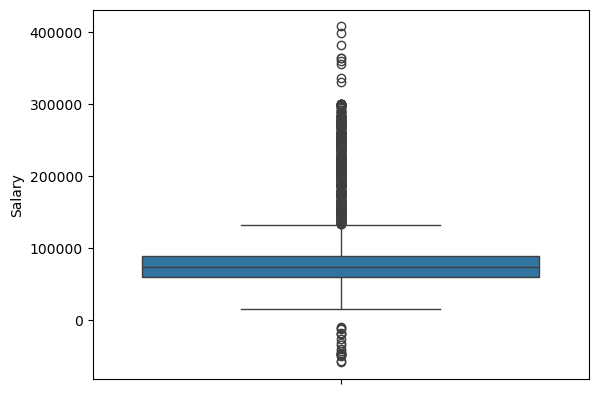

In [309]:
## Me gustaría saber si hay valores muy atípicos para ver cuál de los métodos es más fiable, asi que voy a visualizar los datos mediante un gráfico boxplot.
sns.boxplot(customer_loyalty_history, y='Salary')


In [310]:
## En este caso observamos que existen demasiados valores extremos
# cómo para usar la media, porque el resultado se vería afectado de manera significativa por los outliers altos.
# Por otra parte hay valores en negativo, lo cuál no es posible.
# Primero vamos a tratar los negativos.

salario_negativo=customer_loyalty_history[customer_loyalty_history['Salary']<0]
salario_negativo


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [311]:
customer_loyalty_history['Salary']=customer_loyalty_history['Salary'].abs()

In [312]:
#Hemos eliminado el signo negativo.
customer_loyalty_history[customer_loyalty_history['Salary']<0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


<Axes: ylabel='Salary'>

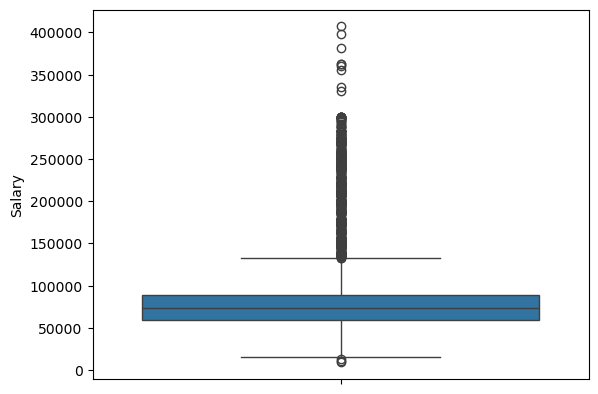

In [313]:
sns.boxplot(customer_loyalty_history, y='Salary')

In [314]:
media_salary=customer_loyalty_history['Salary'].mean()
media_salary

79359.34090727258

In [315]:
mediana_salary=customer_loyalty_history['Salary'].median()
mediana_salary

73455.0

In [316]:
moda_salary=customer_loyalty_history['Salary'].mode()
moda_salary

0    101933.0
Name: Salary, dtype: float64

In [338]:
customer_loyalty_history.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month
count,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000
mean,549735.880445,77864.294198,7988.896536,2015.253211,6.669116
std,258912.132453,30138.879584,6860.982280,1.979111,3.398958
min,100018.000000,9081.000000,1898.010000,2012.000000,1.000000
25%,326603.000000,63899.000000,3980.840000,2014.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000
75%,772019.000000,82940.000000,8940.580000,2017.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000


In [317]:
# Optaremos por usar la mediana para la imputación simple.
customer_loyalty_history['Salary']=customer_loyalty_history['Salary'].fillna(mediana_salary)

In [318]:
# Comprobamos si quedan nulos en la columna Salary.
customer_loyalty_history['Salary'].isnull().sum()

0

In [319]:
# Respecto a las columnas 'Cancellation Year' y 'Cancellation Month'. Vemos que los nulos representan la mayor 
# parte de los datos de la columna, así que podemos deducir que los usuarios que no tienen año y mes de cancelación es porque aún estan dados de alta.
# En este caso, optaría por pasar el dato tipo float a object para crear una nueva categoría: 'Activo'.

In [320]:

customer_loyalty_history['Cancellation Year'] = customer_loyalty_history['Cancellation Year'].astype(object)
customer_loyalty_history

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,73455.0,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,73455.0,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [321]:

customer_loyalty_history['Cancellation Month'] = customer_loyalty_history['Cancellation Month'].astype(object)
customer_loyalty_history

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,73455.0,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,73455.0,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [322]:
customer_loyalty_history['Cancellation Month']=customer_loyalty_history['Cancellation Month'].fillna('Activo')
customer_loyalty_history['Cancellation Month']

0        Activo
1        Activo
2           1.0
3        Activo
4        Activo
          ...  
16732    Activo
16733    Activo
16734    Activo
16735    Activo
16736       8.0
Name: Cancellation Month, Length: 16737, dtype: object

In [323]:
customer_loyalty_history['Cancellation Year']=customer_loyalty_history['Cancellation Year'].fillna('Activo')
customer_loyalty_history['Cancellation Year']

0        Activo
1        Activo
2        2018.0
3        Activo
4        Activo
          ...  
16732    Activo
16733    Activo
16734    Activo
16735    Activo
16736    2016.0
Name: Cancellation Year, Length: 16737, dtype: object

In [324]:
## Vamos a comprobar que ya no hay nulos en el Df.
customer_loyalty_history.isnull().sum()

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

In [325]:
customer_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 33.9 MB


In [326]:
customer_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              16737 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   16737 non-null  object 
 15  Cancellation Month  16737 non-null  object 
dtypes: f

## Análisis mediante visualización

### Distribución de los vuelos mensuales

Text(0.5, 1.0, 'Distribución de vuelos mensuales')

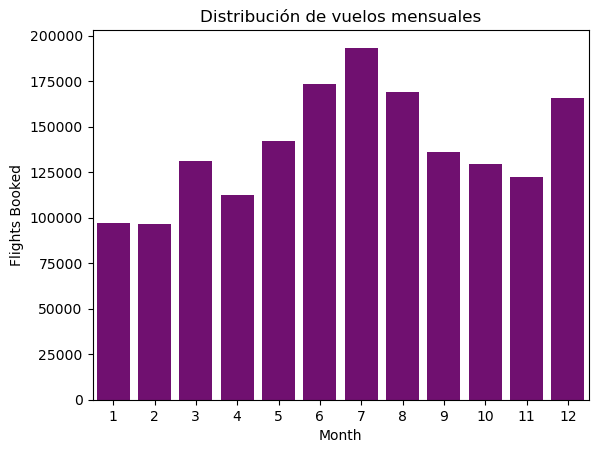

In [327]:
vuelos_por_mes = customer_flight_activity.groupby('Month')['Flights Booked'].sum().reset_index()
sns.barplot(data=vuelos_por_mes, x='Month', y='Flights Booked', color='purple')
plt.title('Distribución de vuelos mensuales')

 Distribución de los vuelos mensuales
 - Analizando la tabla anterior observamos un claro patrón estacional, empezando en Marzo, los vuelos suben progresivamente alcanzando su máximo en Julio,  y alargándose hasta Septiembre, acompañada de la bajada progresiva propia del comienzo de la rutina otoñal.
 - Esta tendencia coincide con la época veraniega, cuando la mayor parte de los clientes tienen vacaciones. 
 - Por otra parte, vemos otra subida en Diciembre (precedida de una bajada en Octubre-Noviembre), coincidiendo con las vacaciones de Navidad y convirtiéndose así en uno de los meses con más desplazamientos del año.

### Relación entre la distancia de los vuelos y los puntos acumulados

<Axes: xlabel='Distance', ylabel='Points Accumulated'>

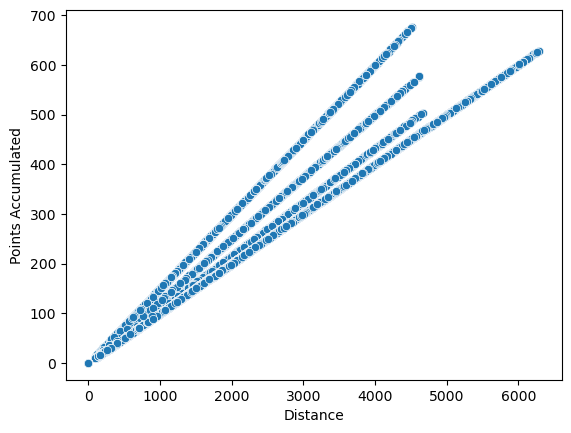

In [ ]:
sns.scatterplot(customer_flight_activity, x='Distance', y='Points Accumulated')
plt.title('Relación entre la distancia y los puntos obtenidos')

¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
- En la siguiente tabla tenemos un gráfico de dispersión que nos ayuda a analizar correctamente dos variables númericas continuas.
- Algo que podemos observar es que, a pesar de volar la misma distancia, hay clientes que obtienen más puntos que otros.
- Deducimos que esto puede tener relación con el tipo de Loyalty Card que poseas. 

In [ ]:
# Para analizar bien me gustaría saber que tarjeta tienen los clientes para ver si tiene relación con acumular más o menos puntos.
# Voy a añadir la columna Loyalty Card al DF Customer_flights_hisotry con un merge.
df_merge = pd.merge(customer_flight_activity, customer_loyalty_history[['Loyalty Number', 'Loyalty Card']], on='Loyalty Number', how='left')
df_merge.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Loyalty Card
0,100018,2017,1,3,0,3,1521,152.0,0,0,Aurora
1,100102,2017,1,10,4,14,2030,203.0,0,0,Nova
2,100140,2017,1,6,0,6,1200,120.0,0,0,Nova
3,100214,2017,1,0,0,0,0,0.0,0,0,Star
4,100272,2017,1,0,0,0,0,0.0,0,0,Star


<Axes: xlabel='Distance', ylabel='Points Accumulated'>

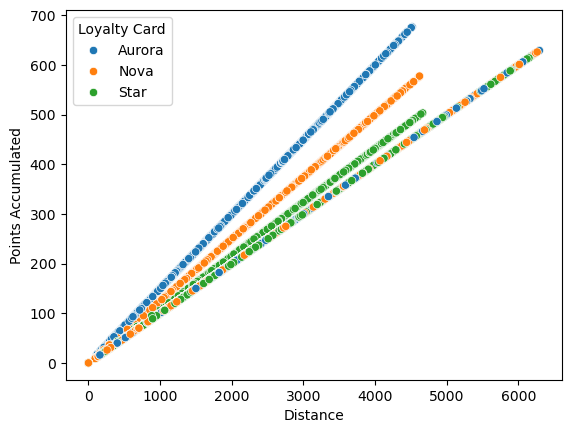

In [346]:
sns.scatterplot(data=df_merge, x='Distance', y='Points Accumulated', hue='Loyalty Card')


¿Tiene relación la tarjeta de fidelidad con los puntos acumulados?
- En este caso, podemos concluir que los clientes que tienen la Aurora, obtienen más puntos volando la misma distancia que los Nova y Star, siendo la Nova la segunda con más categoría.

### Distribución de los clientes por provincia

Text(0, 0.5, 'Clients')

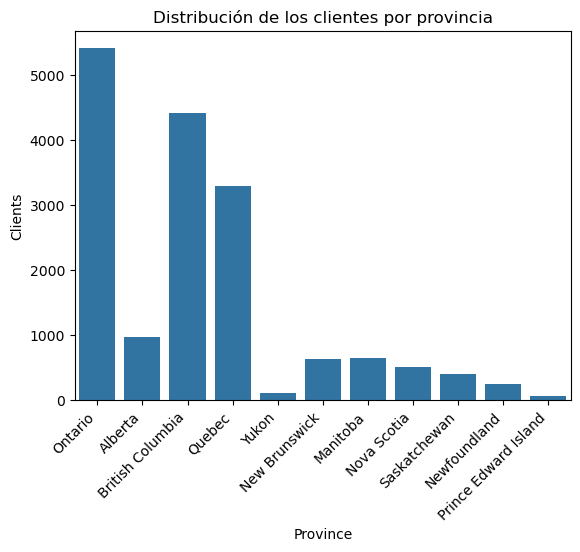

In [340]:
sns.countplot(customer_loyalty_history, x='Province')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de los clientes por provincia')
plt.ylabel('Clients')


- Ontario concentra la mayoría de clientes, seguido de British Columbia y Quebec.
- Las provincias como Yukon, Prince Edward Island y Newfoundland tienen muy pocos clientes.
- Esto probablemente refleja la distribución poblacional real.

### Comparación entre el salario y la educación de los clientes

Text(0.5, 1.0, 'Comparación salario-educación')

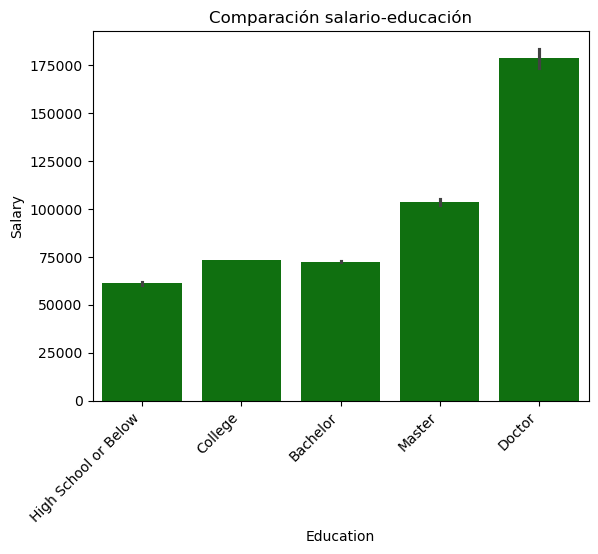

In [351]:
orden = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
sns.barplot(customer_loyalty_history, x= 'Education', y='Salary', color='green', order=orden)
plt.xticks(rotation=45, ha='right')
plt.title('Comparación salario-educación')




- Los salarios aumentan con el nivel educativo, como era de esperar.
- Las personas con Doctorado tienen el salario medio más alto, muy por encima del resto.
- Máster también destaca, superando claramente a "College" y "Bachelor".
- High School or Below tiene el salario más bajo en promedio.

### Proporción de los clientes en función de Loyalty Card

Text(0, 0.5, 'Clients')

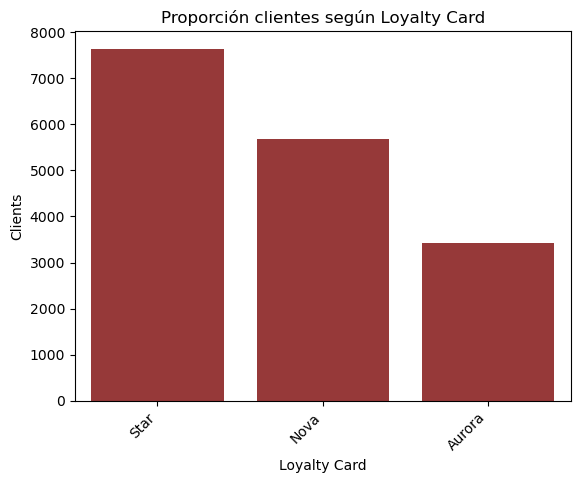

In [348]:
orden=['Star','Nova','Aurora']
sns.countplot(customer_loyalty_history, x='Loyalty Card', color='brown', order=orden)
plt.title('Proporción clientes según Loyalty Card')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Loyalty Card")
plt.ylabel("Clients")


- La tarjeta Star es la que poseen las mayoría de los clientes, seguida de la Nova, algo que tiene sentido puesto que la Aurora es la premium y por tanto la que otorga mayor exclusividad.

### Distribución de los clientes por estado civil y género

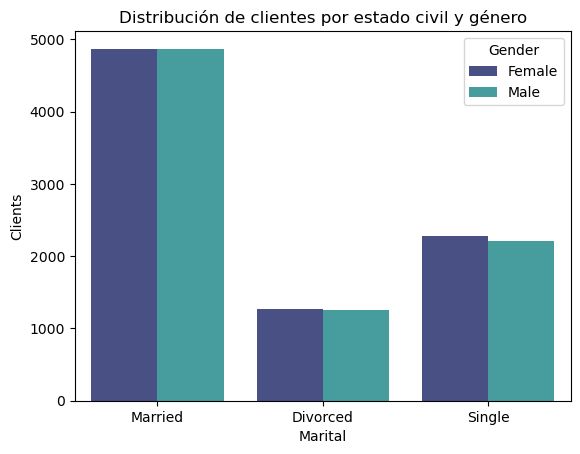

In [343]:

sns.countplot(customer_loyalty_history, x='Marital Status', hue='Gender', palette='mako')
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Marital")
plt.ylabel("Clients")
plt.legend(title="Gender")



- La mayoría de los clientes están casados (Married), tanto hombres como mujeres.
- La cantidad de solteros (Single) es considerablemente menor, pero está bastante equilibrada entre géneros.
- Los divorciados (Divorced) son el grupo menos representado, también con equilibrio de género.